In [79]:
import pandas as pd

filepath_og = 'vehicle_registration_info.csv'
dtype = {'oid': str, 'laden_weight': str, 'mobile_number': str, 'nationality': str, 'no_of_axle': str, 'owner_address': str, 'owner_name': str, 'registration_date': str, 'registration_number': str, 'registration_office_name': str, 'seating_capacity': str,'series_oid': str, 'tax_token_exp_date': str, 'tax_token_issue_date': str, 'unladen_weight': str, 'updated_by': str, 'updated_on': str, 'vehiclecc': str, 'vehicle_class': str, 'vehicle_colour': str, 'vehicle_number': str, 'vehicle_registration_number': str, 'vehicle_series': str, 'vehicle_type': str, 'zone_oid': str, 'bridge_oid': str,'user_oid': str
}
vehicle_registration_data = pd.read_csv(filepath_og, on_bad_lines='skip', index_col= 'oid', dtype = dtype)

# convert joint_owner to boolean
vehicle_registration_data['joint_owner'] = vehicle_registration_data['joint_owner'].map({'YES': True, 'NO': False})


# drop columns with no useful information
columns_to_drop = ['created_on', 'father_husbend_name', 'request_key','response_time','response_time_epoch']

# drop columns with only one value
for col in vehicle_registration_data.columns:
    caridinality = vehicle_registration_data[col].nunique()
    if caridinality < 10:
        # print(col, ": ", caridinality )
        # print(vehicle_registration_data[col].unique())
        if caridinality == 1:
            columns_to_drop.append(col)
vehicle_registration_data_clean = vehicle_registration_data.drop(columns_to_drop, axis=1)

# save data
filepath_clean = 'vehicle_registration_info_clean.csv'
vehicle_registration_data_clean.to_csv(filepath_clean)



In [72]:
columns_to_drop = ['created_on', 'father_husbend_name', 'request_key','response_time','response_time_epoch']
for col in vehicle_registration_data.columns:
    caridinality = vehicle_registration_data[col].nunique()
    if caridinality < 10:
        # print(col, ": ", caridinality )
        # print(vehicle_registration_data[col].unique())
        if caridinality == 1:
            columns_to_drop.append(col)

vehicle_registration_data_clean = vehicle_registration_data.drop(columns_to_drop, axis=1)



In [73]:

vehicle_registration_data_clean_nums = vehicle_registration_data.select_dtypes(exclude=['object'])
vehicle_registration_data_clean_categorical = vehicle_registration_data.select_dtypes(include=['object'])
print("Numerical: ", vehicle_registration_data_clean_nums.columns)
print("Categorical: ", vehicle_registration_data_clean_categorical.columns)


Numerical:  Index(['laden_weight', 'no_of_axle', 'registration_number',
       'response_time_epoch', 'seating_capacity', 'series_oid',
       'unladen_weight', 'updated_by', 'updated_on', 'vehiclecc',
       'vehicle_series', 'zone_oid', 'bridge_oid', 'user_oid'],
      dtype='object')
Categorical:  Index(['created_by', 'created_on', 'father_husbend_name', 'joint_owner',
       'mobile_number', 'nationality', 'owner_address', 'owner_name',
       'registration_date', 'registration_office_name', 'request_key',
       'response_time', 'tax_token_exp_date', 'tax_token_issue_date',
       'vehicle_class', 'vehicle_colour', 'vehicle_number',
       'vehicle_registration_number', 'vehicle_type'],
      dtype='object')


In [74]:
# save cleaned data
filepath_clean = 'vehicle_registration_info_clean.csv'
vehicle_registration_data_clean.to_csv(filepath_clean)




/opt/homebrew/Caskroom/miniconda/base/envs/license-plate/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


joint_owner
NO     171694
YES     11925
Name: count, dtype: int64


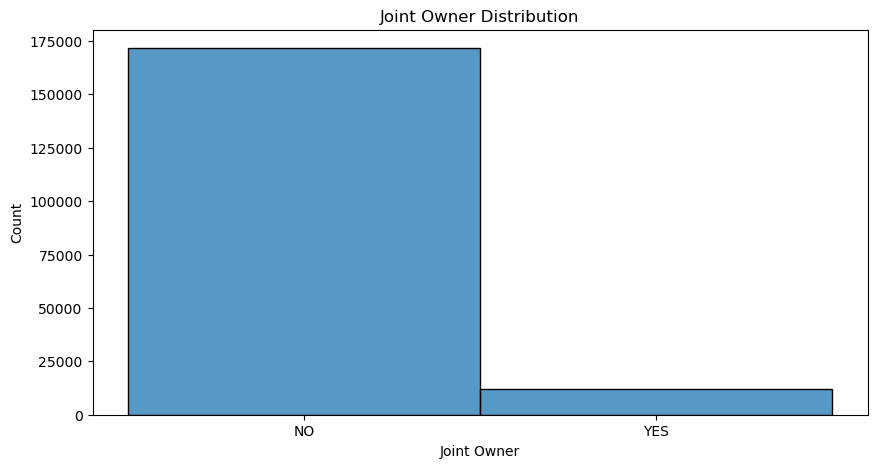

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data = vehicle_registration_data_clean, x = 'joint_owner')
plt.xlabel('Joint Owner')
plt.title('Joint Owner Distribution')

print(vehicle_registration_data_clean.joint_owner.value_counts())



In [76]:
len(vehicle_registration_data_clean.columns)

27